INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


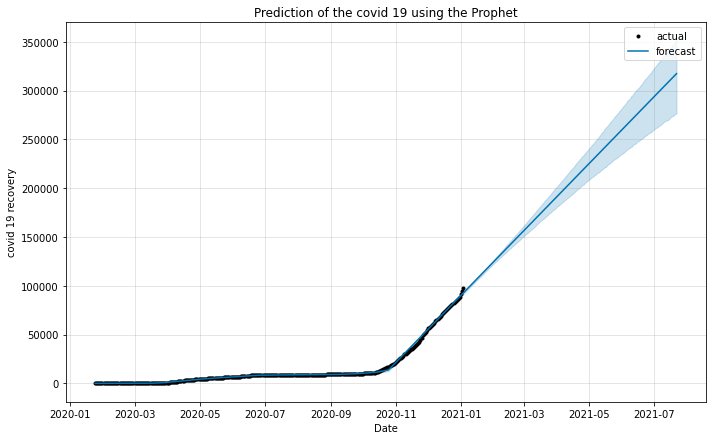

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
import math


data = pd.read_csv('/content/HiezamDataset.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data = data[['Date', 'discharged']]
data = data.rename(columns = {"Date":"ds","discharged":"y"})
df = data[:-3]
future = data[-3:]

train_len = math.ceil(len(df))
train = df[:train_len]
test = df[train_len:]

from fbprophet import Prophet as pp

m = pp(daily_seasonality=True)
m.fit(train)

future = m.make_future_dataframe(periods=200) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the covid 19 using the Prophet")
plt.xlabel("Date")
plt.ylabel("covid 19 recovery")
plt.legend(["actual", "forecast"])
plt.show()